In [1]:
import pandas as pd #use in make dataframe and other thing
import numpy as np #use to make calculation on data
import matplotlib.pyplot as plt #use to print the plot and graph
from collections import Counter #use to count the top n in dictionary

In [2]:
data = pd.read_csv('zomato.csv',encoding='latin-1')# There is latin word in the file so utf-8 and utf-16 showing error
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## 1.The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

### (i) Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

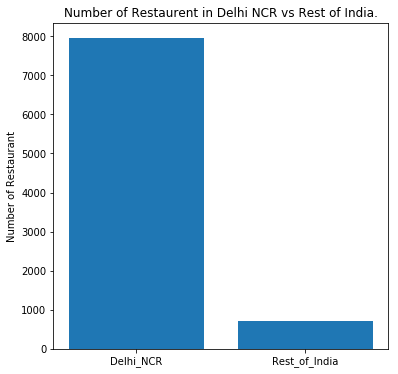

In [3]:
def countrestaurent(data):
    # DELHI-NCR Cities
    rest_data1 = data_india[data_india['City']=='New Delhi'] #Dataframe for New Delhi
    rest_data2 = data_india[data_india['City']=='Ghaziabad'] #Dataframe for Ghaziabad
    rest_data3= data_india[data_india['City']=='Noida'] #Dataframe for Noida
    rest_data4= data_india[data_india['City']=='Gurgaon'] #Dataframe for Gurgaon
    rest_data5= data_india[data_india['City']=='Faridabad'] #Dataframe for Faridabad
    # Delhi NCR city Calculations
    rest_count = rest_data1['City'].count() + rest_data2['City'].count() + rest_data3['City'].count() + rest_data4['City'].count() + rest_data5['City'].count()
    total_city_count = data_india['City'].count() # total number of indian city in data
    return total_city_count,rest_count
 
    
data_india= data[data['Country Code']==1]
Total_city_count,Delhi_NCR = countrestaurent(data_india) #function _call to count restaurent
Rest_res=Total_city_count- Delhi_NCR #Rest of india restaurent count
li=[Delhi_NCR,Rest_res]
li_1=['Delhi_NCR','Rest_of_India'] # x_axis data components

# Graph Plot
plt.subplots(figsize=(6,6))
plt.title('Number of Restaurent in Delhi NCR vs Rest of India.') # title of graph
plt.ylabel("Number of Restaurant") #y label
plt.bar(li_1,li)
plt.show() # show graph

### (ii) Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.  

In [4]:
data_india= data[data['Country Code']==1] #indian data Country code for india in 1
total_cuisines=[]
for ele in data_india['Cuisines']:
    p=ele.split(",") #split the cuisienes on the basis of "," .
    for i in range(len(p)):
        p[i]=p[i].strip() # removed extra space from list element.
    total_cuisines+=p   # calculations of all cuisines serve in all india.

total_cuisines = set(total_cuisines) # convert in set to remove duplicate value of cuisine

delhi_ncr_cuisines=[]

l=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad'] #Delhi_NCR city
for i in l:
    p=data_india[data_india.City==i]
    for ele in p['Cuisines']:
        s=ele.split(",")      #split the cuisienes on the basis of "," .
        for i in range(len(s)):
            s[i]=s[i].strip()  # removed extra space from list element.
        delhi_ncr_cuisines+=s # calculations of all cuisines serve in DELHI-NCR.
        
delhi_ncr_cuisines = set(delhi_ncr_cuisines) # convert in set to remove duplicate value of cuisine

cuisines_not_in_Delhi=total_cuisines.difference(delhi_ncr_cuisines) # set Difference of total_cuisines and delhi_ncr_cuisines will give cuisines,
print("CUISINES THAT ARE NOT SERVED USING IN DELHI_NCR USING zomato.csv:")                                                # that not served in DELHI-NCR
for e in cuisines_not_in_Delhi:
    print(e)   ## Cuisine not present in Delhi NCR but present in rest of india
print("************************************************")  





# list of cuisines actually present in Delhi NCR using Zomato API.
import requests # use to make a request on using API
import json #to convert data in json format.

h = {'user-key' : '3b329b7e62d61368d1f579defae896ea'}  #user key to access the data of zomato
p={'q':'delhi'} #in query we are passing Delhi
r = requests.get('https://developers.zomato.com/api/v2.1/cities', headers = h,params=p)
p=r.json()
city=p['location_suggestions'] #searching in location suggestion 
for ele in city:
    city_id=ele['id'] #finding the id of the city.
    break
response = requests.get('https://developers.zomato.com/api/v2.1/cuisines', headers = h,params={'city_id':city_id}) #finding the
                                                                                         #all that served in Delhi using API request 
response=response.json()
cuisines_name_with_id={}
for i in response['cuisines']:
    cuisines_name_with_id[i['cuisine'].get('cuisine_name')]=i['cuisine'].get('cuisine_id') #making dictionary of key as cusines name and value as id
print("CUISINES THAT ARE NOT SERVED IN DELHI_NCR USING ZOMATO API:")
for ele in cuisines_not_in_Delhi:
    if ele not in cuisines_name_with_id:
        print(ele)

CUISINES THAT ARE NOT SERVED USING IN DELHI_NCR USING zomato.csv:
German
Malwani
BBQ
Cajun
************************************************
CUISINES THAT ARE NOT SERVED IN DELHI_NCR USING ZOMATO API:
Malwani
Cajun


### (iii) Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN REST OF INDIA:
------------------------------------------------------------------------
CUISINE		| NUMBER OF RESTAURANTS 
North Indian    |        349
Chinese         |        242
Continental     |        177
Italian         |        147
Cafe            |        136
Fast Food       |         97
South Indian    |         62
Mughlai         |         59
Desserts        |         55
Mexican         |         50


TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN DELHI-NCR:
------------------------------------------------------------------------
CUISINE		| NUMBER OF RESTAURANTS 
North Indian    |       3597
Chinese         |       2448
Fast Food       |       1866
Mughlai         |        933
Bakery          |        697
South Indian    |        569
Continental     |        547
Desserts        |        542
Street Food     |        538
Italian         |        535


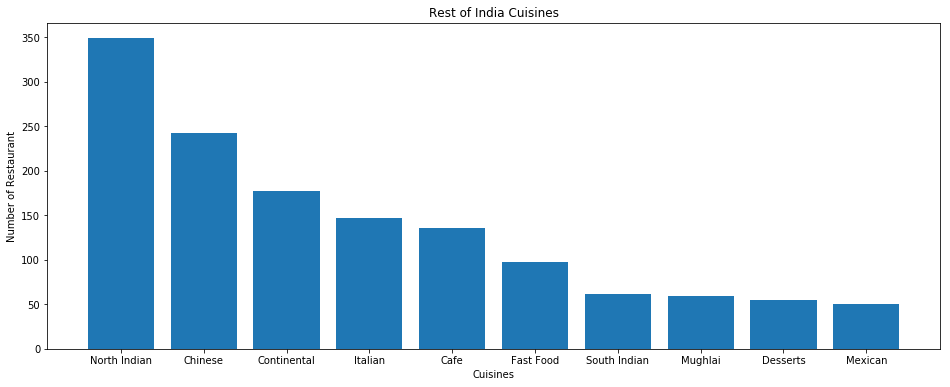

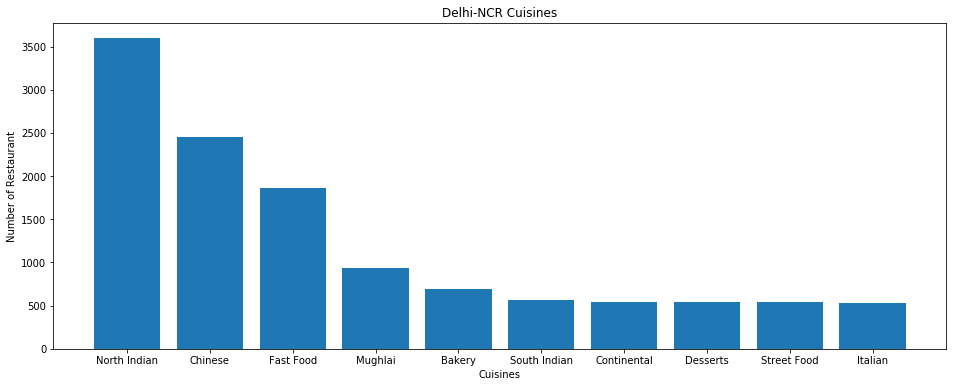

In [5]:

data_india= data[data['Country Code']==1] #Data for city India
total_cuisines=[]
l=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad'] #Delhi_NCR city
for (ele, e) in zip(data_india['Cuisines'],data_india['City']): #zip to itreate 
    if e.strip() not in l: # city that not in ['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad ']
        p=ele.split(",")  #split the cuisienes on the basis of "," .
        for i in range(len(p)):
            p[i]=p[i].strip()  # removed extra space from list element.
        total_cuisines+=p      # calculations of all cuisines serve in all india.
    
delhi_ncr_cuisines=[]

l=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad'] #Delhi NCR city
for i in l:
    p=data_india[data_india.City==i]
    for ele in p['Cuisines']:
        s=ele.split(",")      #split the cuisienes on the basis of "," .
        for i in range(len(s)):
            s[i]=s[i].strip()  # removed extra space from list element.
        delhi_ncr_cuisines+=s # calculations of all cuisines serve in DELHI-NCR.
        
p1=Counter(total_cuisines).most_common(10) # counter to count that which cuisine served in maximum resataurants        
p2=Counter(delhi_ncr_cuisines).most_common(10) # counter to count that which cuisine served in maximum resataurants 
x_Delhi_ncr=[]
y_Delhi_ncr=[]
x_rest_india=[]
y_rest_india=[]
print("TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN REST OF INDIA:")
print("------------------------------------------------------------------------")
print("CUISINE\t\t| NUMBER OF RESTAURANTS ")
for ele in p1:
    x_rest_india.append(ele[0])
    y_rest_india.append(ele[1])
    print('{:<16s}|{:>11d}'.format(ele[0],ele[1]))
print()    
print()    
print("TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN DELHI-NCR:")
print("------------------------------------------------------------------------")
print("CUISINE\t\t| NUMBER OF RESTAURANTS ")
for ele in p2:
    x_Delhi_ncr.append(ele[0])
    y_Delhi_ncr.append(ele[1])
    print('{:<16s}|{:>11d}'.format(ele[0],ele[1]))
#PLOTTING OF GRAPH    
plt.subplots(figsize=(16,6))
plt.bar(x_rest_india,y_rest_india)
plt.title("Rest of India Cuisines")
plt.xlabel('Cuisines') #x_labels
plt.ylabel('Number of Restaurant') #Y_labels
plt.show()
plt.subplots(figsize=(16,6))
plt.bar(x_Delhi_ncr,y_Delhi_ncr,)
plt.title("Delhi-NCR Cuisines")
plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurant')
plt.show()

### (iv)Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference. 

TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN REST OF INDIA:
------------------------------------------------------------------------
CUISINE		| NUMBER OF RESTAURANTS 
North Indian    |        349
Chinese         |        242
Continental     |        177
Italian         |        147
Cafe            |        136
Fast Food       |         97
South Indian    |         62
Mughlai         |         59
Desserts        |         55
Mexican         |         50


TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN DELHI-NCR:
------------------------------------------------------------------------
CUISINE		| NUMBER OF RESTAURANTS 
North Indian    |       3597
Chinese         |       2448
Fast Food       |       1866
Mughlai         |        933
Bakery          |        697
South Indian    |        569
Continental     |        547
Desserts        |        542
Street Food     |        538
Italian         |        535


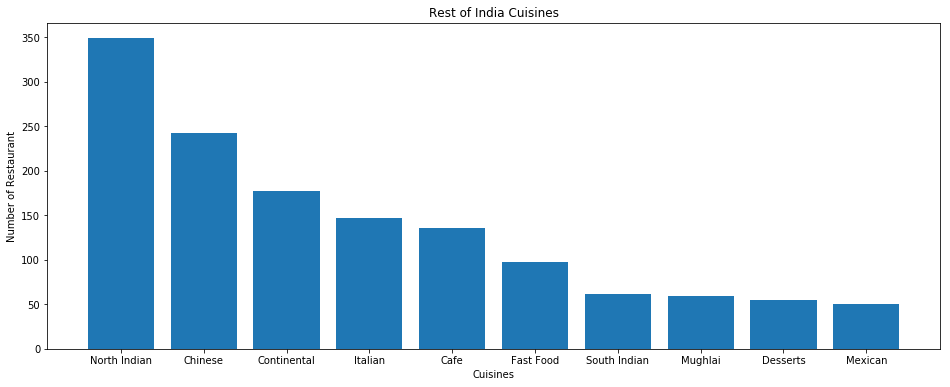

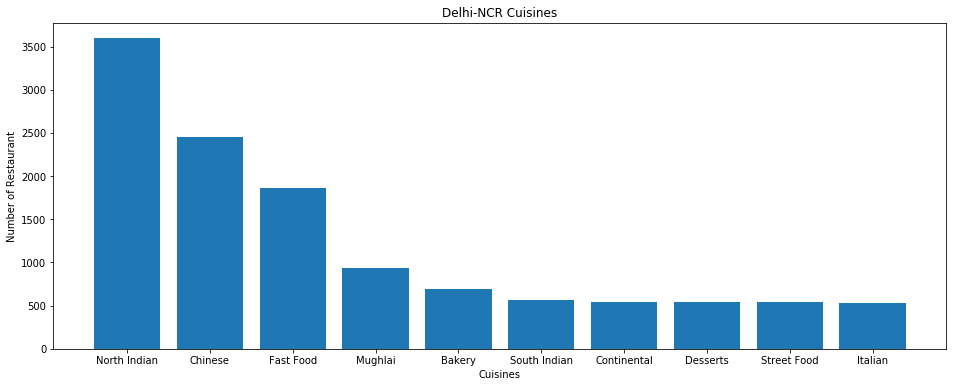

In [6]:

data_india= data[data['Country Code']==1] #DataFrame only for Country india
total_cuisines=[]
l=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']
for (ele, e) in zip(data_india['Cuisines'],data_india['City']): #zip to iterate parallel 
    if e.strip() not in l: # city that not in ['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad ']
        p=ele.split(",")  #split the cuisienes on the basis of "," .
        for i in range(len(p)):
            p[i]=p[i].strip()  # removed extra space from list element.
        total_cuisines+=p      # calculations of all cuisines serve in all india.
    
delhi_ncr_cuisines=[]

l=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad'] #Delhi_Ncr Cities
for i in l:
    p=data_india[data_india.City==i] #calculation for cuisines for all the cities.
    for ele in p['Cuisines']:
        s=ele.split(",")      #split the cuisienes on the basis of "," .
        for i in range(len(s)):
            s[i]=s[i].strip()  # removed extra space from list element.
        delhi_ncr_cuisines+=s # calculations of all cuisines serve in DELHI-NCR.
p1=Counter(total_cuisines).most_common(10) # counter to count that which cuisine served in maximum resataurants        
p2=Counter(delhi_ncr_cuisines).most_common(10) # counter to count that which cuisine served in maximum resataurants 


Delhi_top=[]
rest_top=[]
count1=[]
count2=[]

print("TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN REST OF INDIA:")
print("------------------------------------------------------------------------")
print("CUISINE\t\t| NUMBER OF RESTAURANTS ")
for ele in p1:
    rest_top.append(ele[0])
    count1.append(ele[1])
    print('{:<16s}|{:>11d}'.format(ele[0],ele[1]))
print()    
print()    
print("TOP 10 CUISINE SERVED IN MAXIMUM NUMBER OF RESTAURANTS IN DELHI-NCR:")
print("------------------------------------------------------------------------")
print("CUISINE\t\t| NUMBER OF RESTAURANTS ")
for ele in p2:
    Delhi_top.append(ele[0])
    count2.append(ele[1])
    print('{:<16s}|{:>11d}'.format(ele[0],ele[1]))
    
#PLOTTING OF GRAPH    
plt.subplots(figsize=(16,6))
plt.bar(x_rest_india,y_rest_india)
plt.title("Rest of India Cuisines")
plt.xlabel('Cuisines') #x_labels
plt.ylabel('Number of Restaurant') #Y_labels
plt.show()
plt.subplots(figsize=(16,6))
plt.bar(x_Delhi_ncr,y_Delhi_ncr,)
plt.title("Delhi-NCR Cuisines")
plt.xlabel('Cuisines') #x_labels
plt.ylabel('Number of Restaurant') #Y_labels
plt.show()


Point comes from above Graph:
1. Cuisenes food are more liked in Delhi NCR area compare to rest of india.
2. North Indian is at top position in both(Delhi NCR and rest of india)
3. Mughlai is more famous cuisines in Delhi-NCR compared to rest of India.
4. Fast food is quite famous in Delhi NCR.
5. Continetal is quite famous in rest of india but not much in Delhi NCR
6. Bakery, which is the fifth most abundant cuisine in Delhi-NCR drops further below to the seventh position in the Rest of India.
7. Cafe gets a similar treatment where it is at an eight in Rest of India but drops to the ninth spot in Delhi-NCR



## 2.User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant. 

### (2.1)Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference. 

### (i).Number of Votes given Restaurant 

In [7]:
df=pd.read_csv('zomato.csv',encoding='latin-1') #Data for all the country..
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


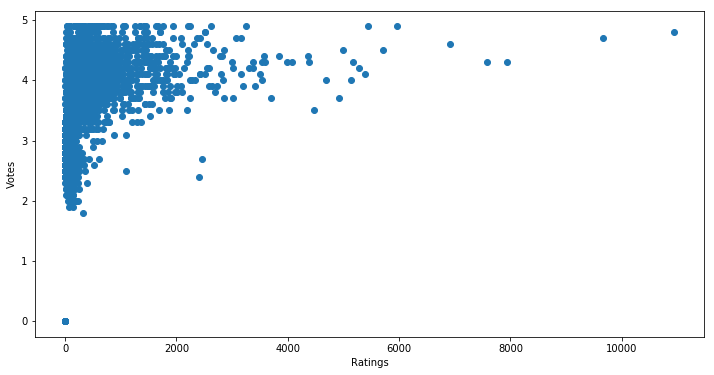

In [22]:
data=df.copy() #make copy of all data
ratings=data['Aggregate rating'] #Aggregate column
votes=data['Votes'] #Votes column
np_ratings=np.array(ratings) #np_array for np_ratings column 
np_votes=np.array(votes) #np_array for votes column
plt.subplots(figsize=(12,6)) #Declare size of graph
plt.scatter(np_votes,np_ratings) #scatter of graph
plt.xlabel('Votes') #x_labels
plt.ylabel('Ratings') #Y_labels
plt.show() #to show the graph


### Analysis:
1. Graph is showing that most of the data lies between where votes 0 to 2000 and rating 2 to 5
2. But some Data point having high rating and high votes.
3. So we can conclude that rating little depend on the votes. 

### (ii)Restaurant serving more number of cuisines. 

In [9]:

data=df.copy() #copy of all data
ratings=data['Aggregate rating']
total_cuisines={}
data.Cuisines.fillna('',inplace=True)

#calculations of the cuisines
def CalCuisine(cuisine):
    p=cuisine.split(',')
    return len(p)

data['Number_Cuisines']=data['Cuisines'].apply(CalCuisine)
data['Number_Cuisines'].value_counts()

2    3444
1    3403
3    1840
4     584
5     164
6      74
7      28
8      14
Name: Number_Cuisines, dtype: int64

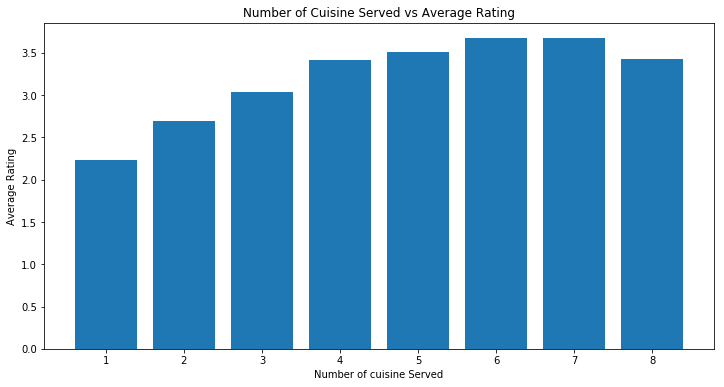

In [39]:
count_cuisine = [i for i in range(1,9)] #Using above data we came to know, Restaurant are serving only cuisenes between 1 ot 8
average_rating_cuisine = []
for i in count_cuisine:
    average_rating_cuisine.append(data[data['Number_Cuisines']==i]['Aggregate rating'].mean())#calculated the rating for each 
    #value between 1 ot 8 then calculated  mean of rating fo average ratings.
    
plt.subplots(figsize=(12,6))    #plot size 
plt.bar(count_cuisine,average_rating_cuisine) #bar graph
plt.xlabel("Number of cuisine Served") #x_labels
plt.ylabel("Average Rating") #y_labels
plt.title("Number of Cuisine Served vs Average Rating")
plt.show() #show graph

 

### Analysis:
1. Number of cuisine directly proportional to the rating.
2. Restaurant serving more number of cuisine have more rating.

### (iii) Average Cost of Restaurant 

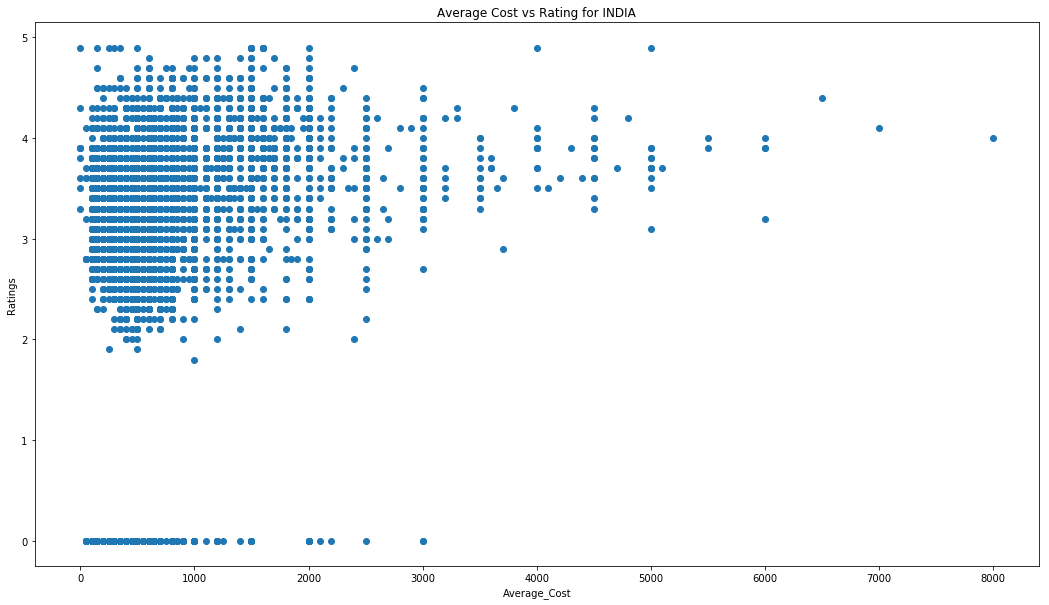

In [10]:
df=data[data['Country Code']==1] #Data for india
data=df.copy() #copy of data
ratings=data['Aggregate rating']
average_cost=data['Average Cost for two']
np_ratings=np.array(ratings)
np_average_cost=np.array(average_cost)
plt.subplots(figsize=(18,10))  #plot size
plt.scatter(np_average_cost,np_ratings)
plt.xlabel('Average_Cost')
plt.ylabel('Ratings')
plt.title('Average Cost vs Rating for INDIA')
plt.show()

### Analysis:
1. In Graph most restaurant lies between Average cost 0 to 2000 and rating 2 to 5
2. But some restaurant have more average cost and more rating.

In [11]:
df=pd.read_csv('zomato.csv',encoding='latin-1') #Dataframe for all country

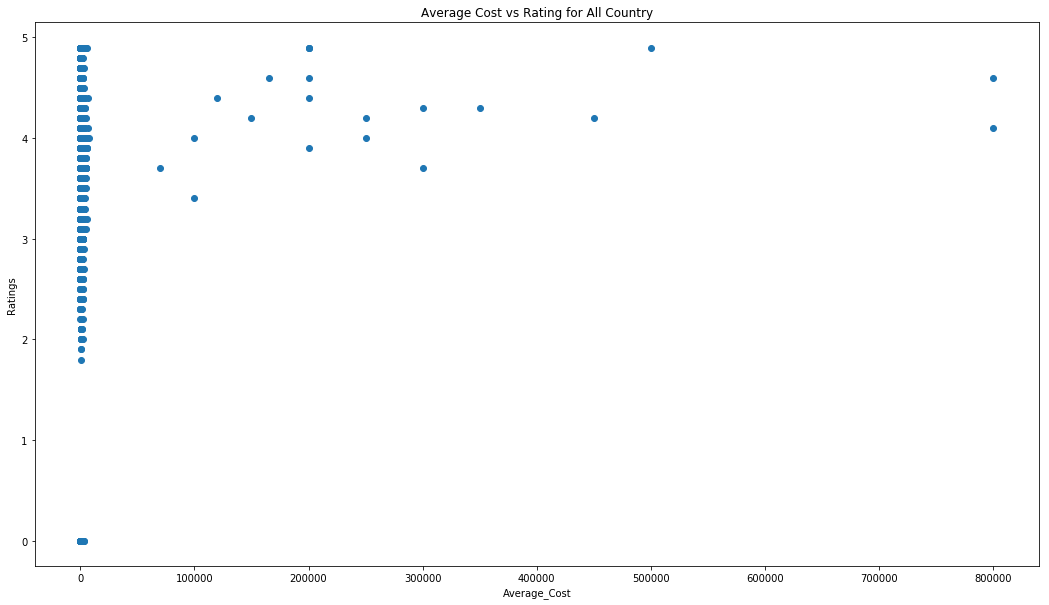

In [12]:

data=df.copy()
ratings=data['Aggregate rating']
average_cost=data['Average Cost for two']
np_ratings=np.array(ratings)
np_average_cost=np.array(average_cost)
plt.subplots(figsize=(18,10)) 
plt.scatter(np_average_cost,np_ratings)
plt.xlabel('Average_Cost')
plt.ylabel('Ratings')
plt.title('Average Cost vs Rating for All Country')
plt.show()

### Analysis:
1. In Graph most restaurant lies between Average cost 0 to 2000 and rating 2 to 5
2. But some restaurant have more average cost and more rating. 

### (iv) Restaurant serving some specific cuisines. 

In [13]:
data=df.copy() #copy Dataframe for all the country.
data.dropna(inplace=True) #drop null values
total_cuisines=[]
for (ele, e) in zip(data_india['Cuisines'],data_india['City']): #zip to iterate parallel 
    p=ele.split(",")  #split the cuisienes on the basis of "," .
    for i in range(len(p)):
        p[i]=p[i].strip()  # removed extra space from list element.
    total_cuisines+=p      # calculations of all cuisines serve in all india.
p1=Counter(total_cuisines).most_common(15) # counter count the 15 cuisines that served maximum number of times in Restaurant. 
cuisine=[]
print("TOP 15 CUISINE SERVED IN MAXIMUM NUMBER In ALL RESTAURANTS:")
print("------------------------------------------------------------------------")
print("CUISINE\t\t| NUMBER OF RESTAURANTS ")
for ele in p1:
    cuisine.append(ele[0])
    print('{:<16s}|{:>11d}'.format(ele[0],ele[1]))
print()      

TOP 15 CUISINE SERVED IN MAXIMUM NUMBER In ALL RESTAURANTS:
------------------------------------------------------------------------
CUISINE		| NUMBER OF RESTAURANTS 
North Indian    |       3946
Chinese         |       2690
Fast Food       |       1963
Mughlai         |        992
Bakery          |        726
Continental     |        724
Italian         |        682
South Indian    |        631
Cafe            |        627
Desserts        |        597
Street Food     |        554
Mithai          |        380
Pizza           |        313
American        |        225
Ice Cream       |        216



In [14]:
dp=list(zip(data['Cuisines'],data['Aggregate rating'])) # make a list of using zip of columns Cuisines and Aggregate rating. 

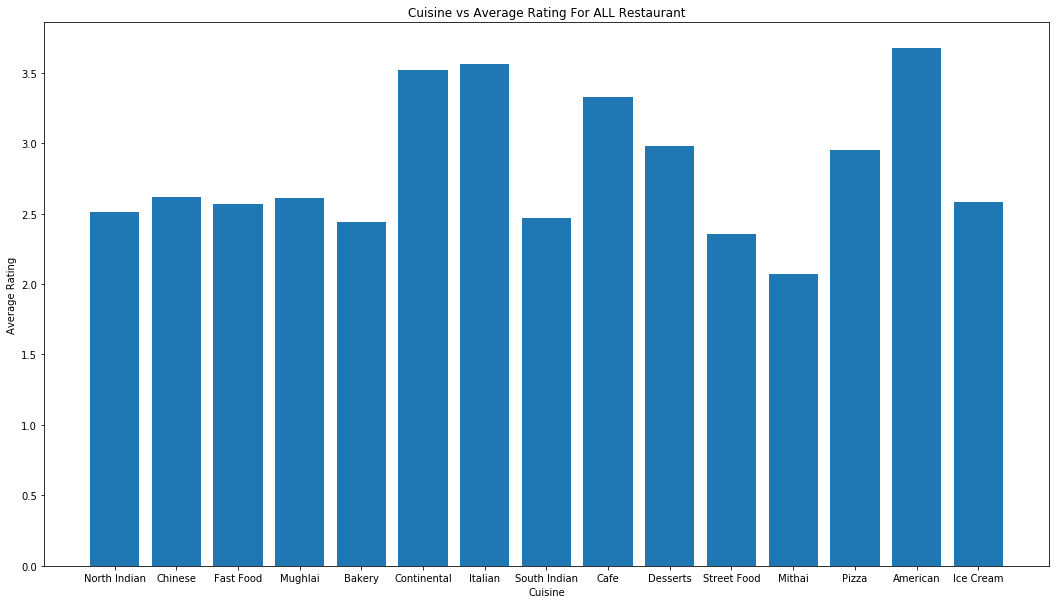

In [15]:
average_rating_restaurant=[]
for cui in cuisine:
    sum=0;
    count=0
    for i in range(len(dp)):
        if cui in dp[i][0]:
            sum=sum+dp[i][1] #sum of all the Aggreating rating of each cuisines.
            count=count+1
    average_rating_restaurant.append(sum/count) #mean of aggreating fo all the cuisines. 
plt.subplots(figsize=(18,10)) #graph size 

#Graph Plotting.
plt.bar(cuisine,average_rating_restaurant)
plt.title("Cuisine vs Average Rating For ALL Restaurant")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.show()

### Analysis:
1. By above graph we can conclude that rating depend on the some specific cuisine.
2. American cuisine has more than 3.5 average rating.
3. Continental Itlian also have good rating more than 3
4. Cafe and dessert also have good average rating.

### (2.2)Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

### (1)Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) . 

------------------------------------------------------------------
Connaught Place     | 3.85058739
Rajouri Garden      | 3.95026857
Shahdara            | 2.67698057
Defence Colony      | 3.75101936
Malviya Nagar       | 3.51786435
Pitampura           | 3.25551988
Mayur Vihar Phase 1 | 3.05184989
Rajinder Nagar      | 3.30493135
Safdarjung          | 3.86026932
Satyaniketan        | 3.98874711
------------------------------------------------------------------


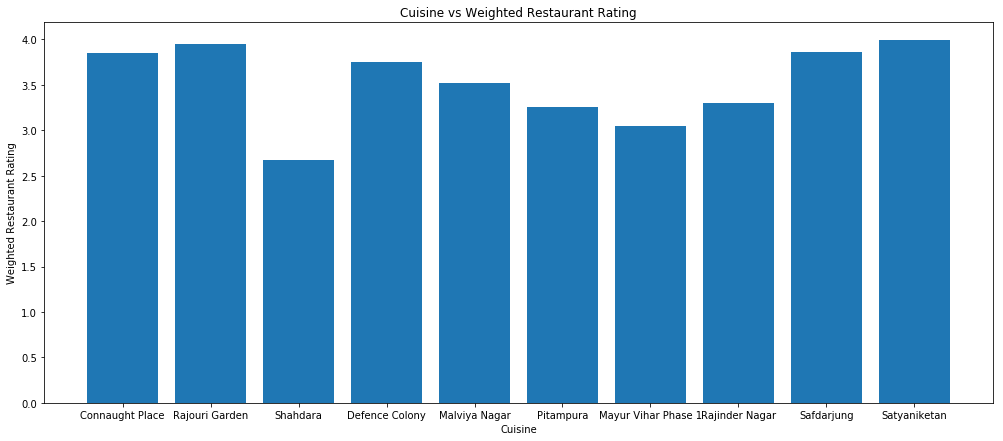

In [16]:

df['Aggregate_rating_Votes']=df['Aggregate rating']*df['Votes'] #making another column Aggregate_rating_Votes.
data=df.copy() #copy of data
locality=[]
Weighted_Restaurant_Rating=[]
top_10_locality=[]
top_10_weighted=[]
p=data.Locality.value_counts() #calculating value how many time came.
new_index = p.index #making new index of p values.
for ele in new_index:
    d=data[data['Locality']==ele]
    total_result = d['Aggregate_rating_Votes'].sum()
    count= d['Votes'].sum()
    if count == 0: #if count zero then continue other wise total_result/count give error.
        continue
    weighted=total_result/count
    locality.append(ele)
    Weighted_Restaurant_Rating.append(weighted)
locality=locality[0:10] #top 10 localties
Weighted_Restaurant_Rating=Weighted_Restaurant_Rating[0:10] #top 10 weighted_restaurant_rating.

#printing Data
print("------------------------------------------------------------------")
for e1, e2 in zip(locality,Weighted_Restaurant_Rating):
    print('{:<20s}|{:>11.8f}'.format(e1,e2))
print("------------------------------------------------------------------")
#plotting of Graph    
plt.subplots(figsize=(17,7))    
plt.bar(locality,Weighted_Restaurant_Rating)
plt.xlabel("Cuisine")
plt.ylabel("Weighted Restaurant Rating")
plt.title("Cuisine vs Weighted Restaurant Rating")
plt.show()     

## (C)Visualization

### (1)Plot the bar graph top 15 restaurants have a maximum number of outlets.

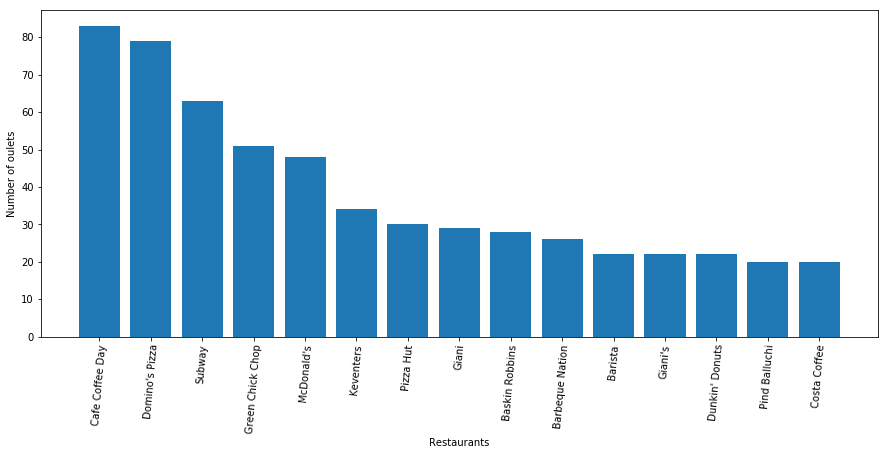

In [17]:
data = df.copy() #Data copy
p=data['Restaurant Name'].value_counts() #counting of outlets.
top_15_res=p.index[0:15] #top 15 restaurant 
top_15_out=p.values[0:15] #top 15 counting values

#plotting Graph
plt.subplots(figsize=(15,6))
plt.bar(top_15_res,top_15_out)
plt.xlabel('Restaurants')
plt.ylabel('Number of oulets')
plt.xticks(rotation=85)
plt.show()

### (2)Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).


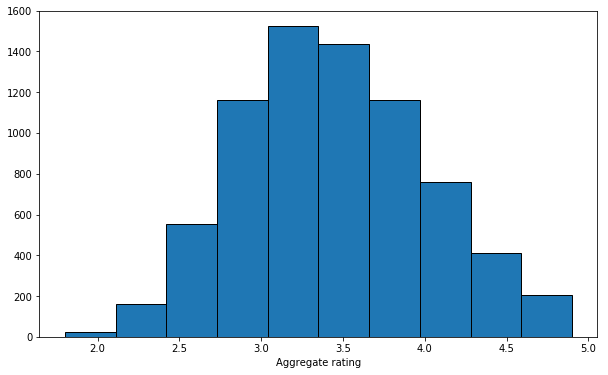

In [18]:

data=df.copy() # data copy
p=data[data['Aggregate rating']!=0] #Droping unrated restaurant.

new = p['Aggregate rating'] #Aggregate rating column Data
#ploting of graph
plt.subplots(figsize=(10,6))
plt.hist(new,bins=10,edgecolor='black') 
plt.xlabel('Aggregate rating')
plt.show()

### (3)Plot the bar graph top 10 restaurants in the data with the highest number of votes.

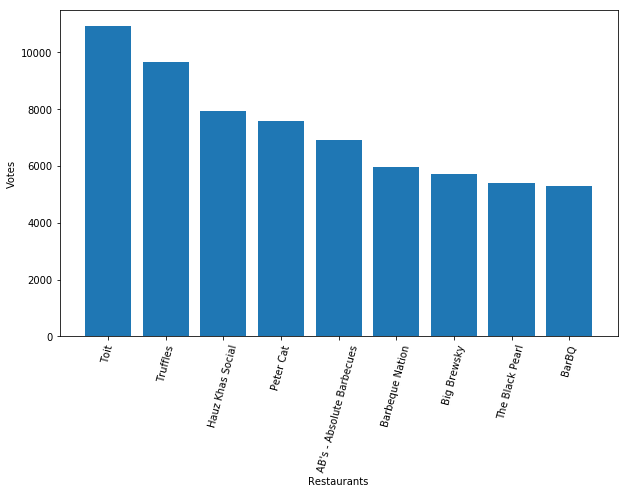

In [19]:
data=df.copy() #data copy
votes=data['Votes'].values #it gives values
top_10_res=[]
top_10_votes=[]
new_res_name=data['Restaurant Name'].values #all restaurants name
#calculating top 10 restaurant 
for k in range(10):
    maxi=-999999
    for i in range(len(votes)):
        if votes[i]>maxi:
            index=i
            maxi=votes[i]
            max_res=new_res_name[i]
    top_10_res.append(max_res)
    top_10_votes.append(maxi)
    votes[index]=-999999999999
    
# Graph plotting    
plt.subplots(figsize=(10,6))    
plt.bar(top_10_res,top_10_votes)
plt.xlabel('Restaurants')
plt.ylabel('Votes')
plt.xticks(rotation=75)
plt.show()

### (4)Plot the pie graph of top 10 cuisines present in restaurants in the USA.

[('American', 112), ('Seafood', 59), ('Burger', 49), ('Sandwich', 49), ('Pizza', 49), ('Steak', 42), ('Italian', 38), ('Breakfast', 37), ('Mexican', 36), ('Sushi', 34)]


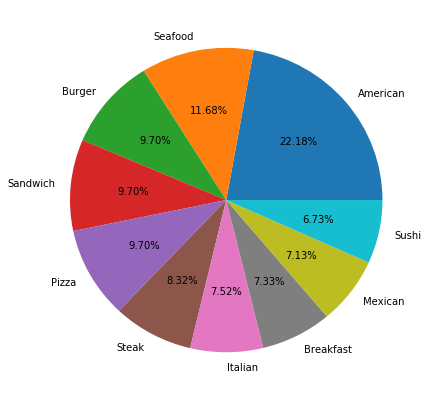

In [20]:

data = df.copy()
data.Cuisines.fillna('',inplace=True) #drop all null value
data_usa= data[data['Country Code']==216] #216 USA country code.
total_cuisines=[]
for ele in data_usa['Cuisines']:
    p=ele.split(",")  #split the cuisienes on the basis of "," .
    for i in range(len(p)):
        p[i]=p[i].strip()  # removed extra space from list element.
    total_cuisines+=p      # calculations of all cuisines serve in all india.
count = []
cuisine = []
p1=Counter(total_cuisines).most_common(10) #top 10 cuisines in USA restaurants.
print(p1)

#plotting pie graph.
for ele in p1:
    cuisine.append(ele[0])
    count.append(ele[1])
plt.subplots(figsize=(7,7))    
plt.pie(count,labels=cuisine,autopct='%.2f%%')
plt.show() #show graph   

### (5)Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

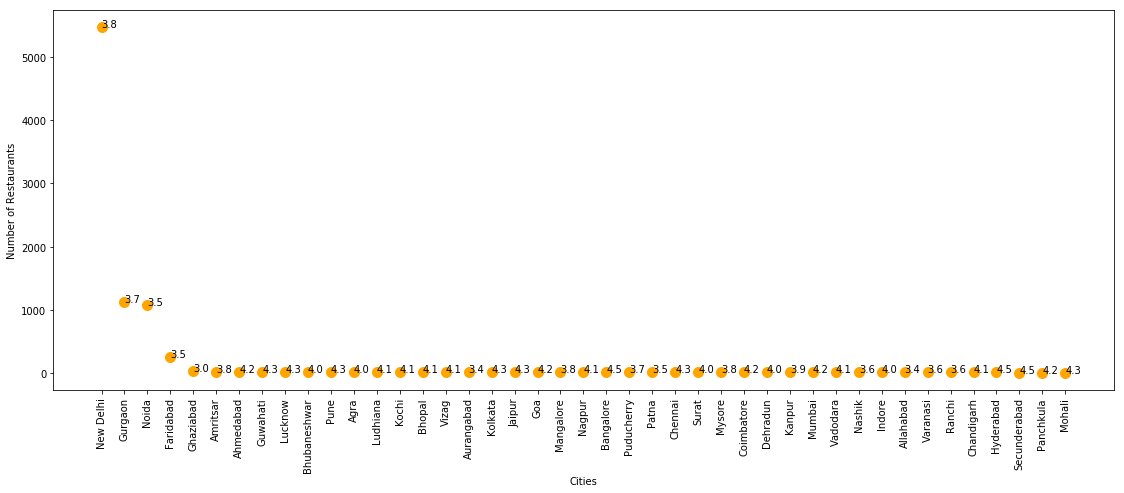

In [21]:
df=df.copy() #Data copy 
locality=[]
ef=df[df['Country Code']==1] # India country data
new=ef.City.value_counts() #city value counts
Weighted_Restaurant_Rating=[]
res_name=new.index # city name as index
no_of_res=new.values #city count as a value
for i in res_name:
    locality.append(i)
    tf=df[df.City==i]
    af=tf.copy()
    af['new_col']=tf['Votes']*tf['Aggregate rating'] #adding new column in data frame 
    total=af.new_col.sum() #sum of all col data
    count=af.Votes.sum() #sum of votes 
    weighted=total/count #weighted restaurant rating for each
    Weighted_Restaurant_Rating.append(weighted)
Weighted_Restaurant_Rating = [ round(elem, 1) for elem in Weighted_Restaurant_Rating]#round of the value of Weighted_Restaurant_Rating
#Plotting Graph
plt.subplots(figsize=(19,7))
plt.scatter(res_name,no_of_res,s=100,color='orange')
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
#pltting the value in th graph.
for i in range(len(Weighted_Restaurant_Rating)):
    plt.text(res_name[i],no_of_res[i],Weighted_Restaurant_Rating[i]) #text value in graph.
plt.show()